In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', palette='muted', color_codes=True)

%matplotlib inline

In [2]:
data = pd.read_csv("./input/Ecommerce Customers.csv")

In [3]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [5]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


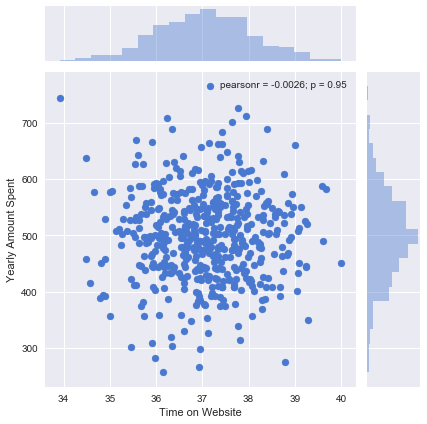

In [6]:
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data = data)

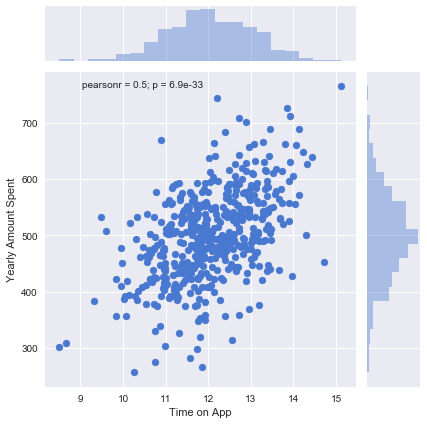

In [7]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data = data)

It seems that there is an approximate **linear relation** between **Time on App** & **Yearly Amount Spent** 

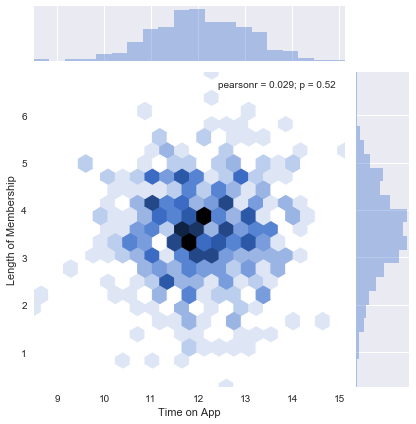

In [8]:
sns.jointplot(x = 'Time on App', y = 'Length of Membership', data = data, kind='hex')

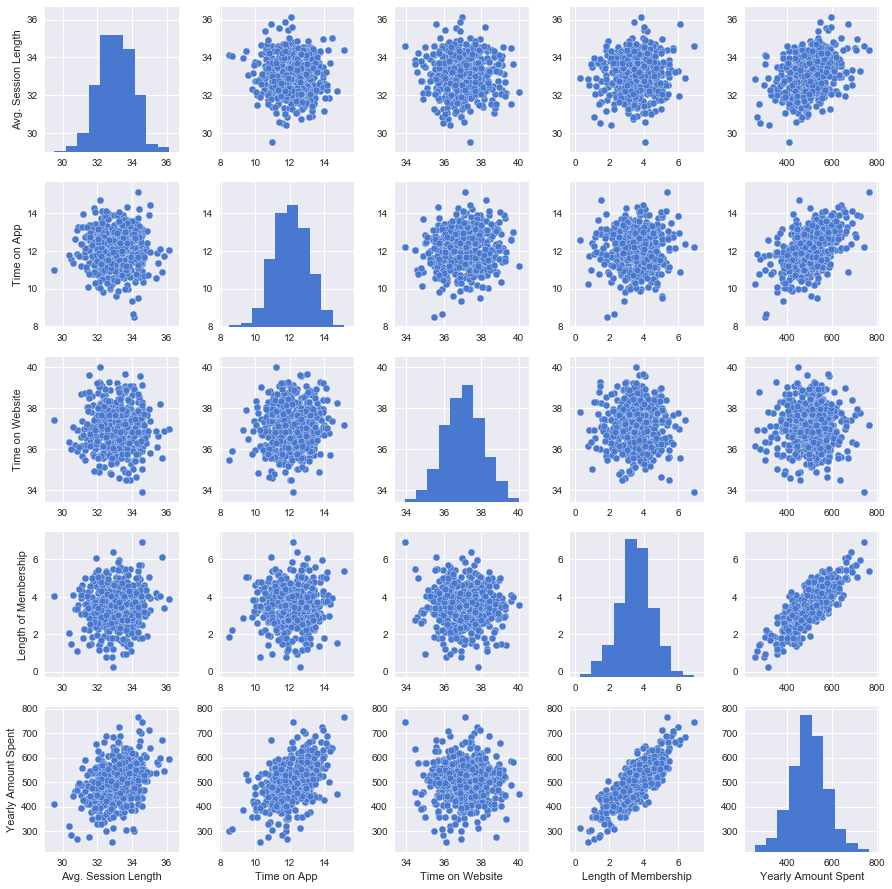

In [9]:
sns.pairplot(data)

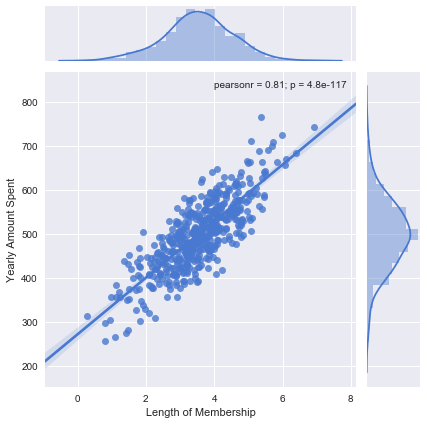

In [10]:
sns.jointplot(x = 'Length of Membership', y =  'Yearly Amount Spent', data = data, kind = 'reg')

In [11]:
selected_features = ['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']

In [12]:
X = data[selected_features]
y = data['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lreg = LinearRegression()

In [17]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
lreg.coef_

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

In [19]:
y_predict = lreg.predict(X_test)

(Text(0.5,0,'y test'), Text(0,0.5,'y predict'))

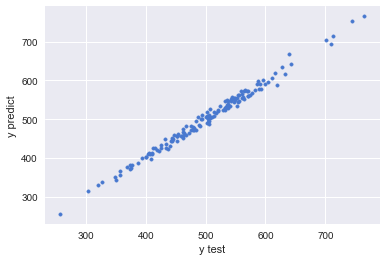

In [20]:
plt.scatter(x = y_test, y = y_predict, c = 'b', marker = '.')
plt.xlabel('y test'), plt.ylabel('y predict')

In [21]:
print("MAE: %f" % np.abs(y_predict - y_test).mean())
print("MSE: %f" % ((y_predict - y_test)*(y_predict - y_test)).mean())
print("RMSE:%f" % np.sqrt(((y_predict - y_test)*(y_predict - y_test)).mean()))

MAE: 7.228149
MSE: 79.813052
RMSE:8.933815


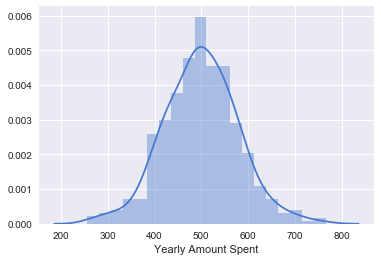

In [22]:
sns.distplot(data['Yearly Amount Spent'])

In [23]:
coefficient = pd.DataFrame(lreg.coef_, index = selected_features, columns = ['Coefficient'])

In [24]:
coefficient

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
